In [2]:
from scipy import ndimage
import imageio
import matplotlib.pyplot as plt
import os

In [50]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import umap
reducer = umap.UMAP()
%matplotlib inline

In [4]:
def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax    

In [154]:
widths = []
heights = []
target = []

directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Cancer'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    width = rmax-rmin
    height = cmax-cmin
    widths.append(width)
    heights.append(height)
    target.append(0)

directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Immuno'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    width = rmax-rmin
    height = cmax-cmin
    widths.append(width)
    heights.append(height)
    target.append(1)

directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Other'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    width = rmax-rmin
    height = cmax-cmin
    widths.append(width)
    heights.append(height)
    target.append(2)
    
Mwidths = max(widths)
Mheights = max(heights)
print(Mwidths,Mheights)

(47, 54)


In [155]:
nullimg = np.zeros(Mwidths,Mheights)
images = []
directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Cancer'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    padwidth = int(Mwidths-(rmax-rmin))
    padheight = int(Mheights-(cmax-cmin))
    newimg = np.pad(img[rmin:rmax,cmin:cmax],((0,padwidth),(0,padheight)),'constant', constant_values=(0))
    images.append(newimg)
directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Immuno'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    padwidth = int(Mwidths-(rmax-rmin))
    padheight = int(Mheights-(cmax-cmin))
    newimg = np.pad(img[rmin:rmax,cmin:cmax],((0,padwidth),(0,padheight)),'constant', constant_values=(0))
    images.append(newimg)
directory = '/home/garner1/Downloads/Classification_single_cells copy/Classification_single_cells copy/Other'
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    img = imageio.imread(filename)
    rmin, rmax, cmin, cmax = bbox(img)
    padwidth = int(Mwidths-(rmax-rmin))
    padheight = int(Mheights-(cmax-cmin))
    newimg = np.pad(img[rmin:rmax,cmin:cmax],((0,padwidth),(0,padheight)),'constant', constant_values=(0))
    images.append(newimg)

In [156]:
print(len(images))
# for img in images[:10]:
#     plt.imshow(img)
#     plt.show()

600


In [157]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(168,120)})

fig, ax_array = plt.subplots(30,20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [283]:
data = np.zeros((Mwidths*Mheights,len(images)))
for ind in range(len(images)): data[:,ind] = images[ind].flatten() # from 2D arrays to 1D arrays
data = data.transpose()

reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=3, n_epochs=500,
   n_neighbors=10, negative_sample_rate=10, random_state=47,
   repulsion_strength=1.0, set_op_mix_ratio=0.5, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=10.0,
   transform_seed=42, verbose=False)
reducer.fit(data)

embedding = reducer.transform(data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(600, 3)

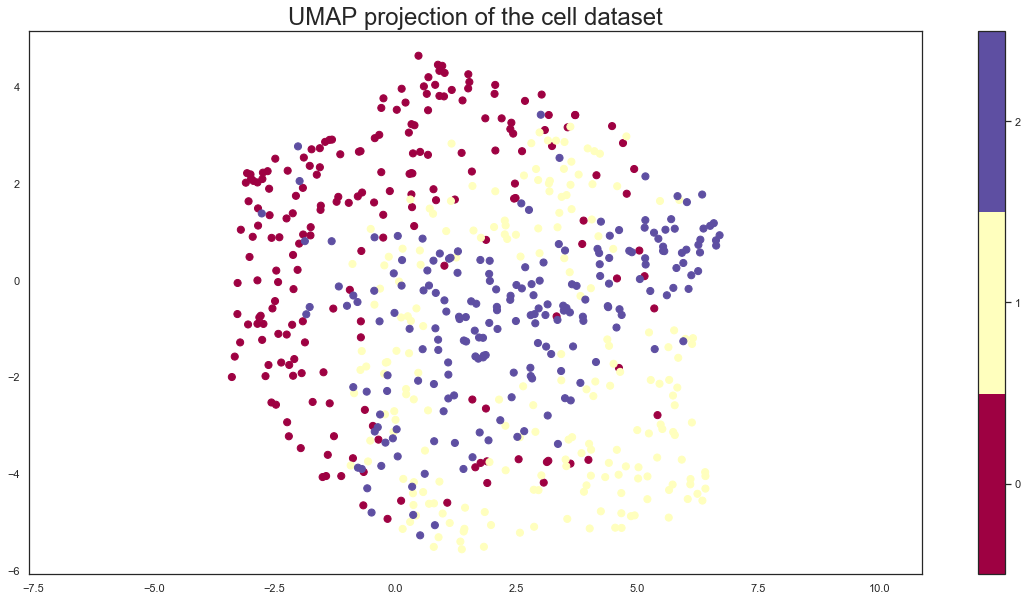

In [230]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

plt.scatter(embedding[:, 0], embedding[:, 1], c=np.asarray(target), cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the cell dataset', fontsize=24);

In [285]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=embedding[:,0],  # <-- Put your data instead
    y=embedding[:,1],  # <-- Put your data instead
    z=embedding[:,2],  # <-- Put your data instead
    mode='markers',
    marker=dict(color=np.asarray(target),size=5, opacity=1)
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [1]:
# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 245 edges and 94 nodes in 0:00:00.279509.
Wrote visualization to: make_circles_keplermapper_output.html


u'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  

In [3]:
labels

array([1, 0, 0, ..., 1, 0, 0])